Preprocessing data:
1. filter out data with values <null> under column Longitude and Latitude.
    We have check is there any data only have either longitude or latitude. Fortunately, all of them are in the right way.
2. filter out data with values <null> under column Score.
3. filter out data with values <null> under column Grade.
4. because we leave the grade, so we create a column called year based on the graded date.
5. cluster and column "STREET" and "DBA"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import contextily as ctx

In [2]:
data = pd.read_csv('project_data.csv')

In [3]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09
2,50073295,HAVANA EXPRESS,Bronx,815,HUTCHINSON RIVER PARKWAY,10465.0,7185181800,Mexican,02/06/2018,Violations were cited in the following area(s).,...,11/23/2020,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,210.0,13.0,9000.0,2080263.0,2055597501,BX09
3,41612554,DUNKIN',Bronx,3732,EAST TREMONT AVENUE,10465.0,3474787992,Café/Coffee/Tea,02/14/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.826475,-73.822010,210.0,13.0,15200.0,2079944.0,2055430156,BX52
4,50044005,HAPPY GARDEN,Brooklyn,7211,3 AVENUE,11209.0,7187481113,Chinese,02/14/2017,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.633354,-74.027000,310.0,43.0,6600.0,3147329.0,3059080007,BK31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201185,50051967,GONG CHA,Queens,90-15,QUEENS BOULEVARD,11373.0,6462673807,Café/Coffee/Tea,01/09/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4018600100,QN29
201186,41310522,BLACKBIRD'S,Queens,41-19,30 AVENUE,11103.0,7189436899,American,12/27/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.763411,-73.913965,401.0,22.0,14700.0,4010841.0,4006640041,QN70
201187,41243875,ANIL'S ROTI SHOP,Queens,12501,LIBERTY AVENUE,11419.0,7188452800,Caribbean,09/01/2016,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.688157,-73.819222,410.0,28.0,15802.0,4203928.0,4095620031,QN55
201188,50049226,CARVEL 1939,Brooklyn,6510,BAY PARKWAY,11204.0,7183319383,"Ice Cream, Gelato, Yogurt, Ices",07/23/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.613599,-73.981707,311.0,47.0,25600.0,3134083.0,3055570043,BK28


In [5]:
data.describe()

,CAMIS,ZIPCODE,SCORE,year,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2.011900e+05,197727.000000,201190.000000,198700.000000,201190.000000,201190.000000,197727.000000,197727.000000,197727.000000,1.968290e+05,2.011900e+05
mean,4.606710e+07,10678.979183,13.002997,2018.236376,40.027524,-72.670494,248.895958,20.058935,28864.028453,2.514571e+06,2.398246e+09
std,4.413468e+06,595.297028,8.669292,1.003895,5.297710,9.617573,130.683491,15.810061,30707.005709,1.351041e+06,1.347062e+09
min,3.011234e+07,10000.000000,-1.000000,2012.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.138363e+07,10022.000000,9.000000,2018.000000,40.685278,-73.989115,105.000000,4.000000,7900.000000,1.043149e+06,1.010360e+09
50%,5.000566e+07,10468.000000,12.000000,2018.000000,40.732431,-73.958289,301.000000,20.000000,16002.000000,3.007533e+06,3.001520e+09
75%,5.005739e+07,11229.000000,13.000000,2019.000000,40.761712,-73.897901,401.000000,34.000000,40304.000000,4.002051e+06,4.001620e+09
max,5.010623e+07,12345.000000,133.000000,2020.000000,40.912822,0.000000,503.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [6]:
groupByYears = data.groupby('year')

In [7]:
groupByRestaurant = data.groupby('CAMIS')

In [8]:
groupByYears.count()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
year,,,,,,,,,,,,,,,,,,,,,
2012.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2013.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2014.0,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2015.0,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
2016.0,8954,8954,8954,8954,8954,8709,8954,8954,8954,8954,...,8954,8954,8954,8954,8709,8709,8709,8674,8954,8709
2017.0,39149,39149,39149,39149,39149,38387,39145,39149,39149,39149,...,39149,39149,39149,39149,38387,38387,38387,38202,39149,38387
2018.0,61531,61531,61531,61531,61531,60492,61527,61531,61531,61531,...,61531,61531,61531,61531,60492,60492,60492,60217,61531,60492
2019.0,73573,73573,73573,73573,73573,72407,73571,73573,73573,73573,...,73573,73573,73573,73573,72407,72407,72407,72068,73573,72407
2020.0,15395,15395,15395,15395,15395,15171,15394,15395,15395,15395,...,15395,15395,15395,15395,15171,15171,15171,15119,15395,15171


In [9]:
groupByRestaurant.count()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
CAMIS,,,,,,,,,,,,,,,,,,,,,
30112340,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
30191841,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
40356018,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
40356483,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
40356731,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50105004,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
50105045,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
50106032,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [10]:
findOneSpecificRestaurant = data[data['CAMIS'] == 30112340]

In [11]:
findOneSpecificRestaurant

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
37634,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/13/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
49630,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/13/2018,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
57018,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
76994,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/06/2017,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
89036,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/30/2016,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
118474,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/06/2017,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
119335,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
130170,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/27/2016,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
142046,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/30/2016,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Re-inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60
158166,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,...,11/23/2020,Cycle Inspection / Initial Inspection,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3011970017,BK60


### We can see that one restaurant have multiple records on different record date. 
But we also see a date information called inspection date, we need to see how do this date data work.

In [12]:
data2 = pd.read_csv('project_data2.csv')
data2
data2.describe()

,CAMIS,ZIPCODE,Inspection_year,SCORE,year,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,2.011900e+05,197727.000000,201190.000000,201190.000000,198700.000000,201190.000000,201190.000000,197727.000000,197727.000000,197727.000000,1.968290e+05,2.011900e+05
mean,4.606710e+07,10678.979183,2018.254839,13.002997,2018.236376,40.027524,-72.670494,248.895958,20.058935,28864.028453,2.514571e+06,2.398246e+09
std,4.413468e+06,595.297028,1.012640,8.669292,1.003895,5.297710,9.617573,130.683491,15.810061,30707.005709,1.351041e+06,1.347062e+09
min,3.011234e+07,10000.000000,2012.000000,-1.000000,2012.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.138363e+07,10022.000000,2018.000000,9.000000,2018.000000,40.685278,-73.989115,105.000000,4.000000,7900.000000,1.043149e+06,1.010360e+09
50%,5.000566e+07,10468.000000,2018.000000,12.000000,2018.000000,40.732431,-73.958289,301.000000,20.000000,16002.000000,3.007533e+06,3.001520e+09
75%,5.005739e+07,11229.000000,2019.000000,13.000000,2019.000000,40.761712,-73.897901,401.000000,34.000000,40304.000000,4.002051e+06,4.001620e+09
max,5.010623e+07,12345.000000,2020.000000,133.000000,2020.000000,40.912822,0.000000,503.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [13]:
data2ByInspectionYear = data2.groupby('Inspection_year')

In [14]:
data2ByInspectionYear.describe()

CAMIS                                                       \
                   count          mean           std         min          25%   
Inspection_year                                                                 
2012                 6.0  4.154404e+07  0.000000e+00  41544044.0  41544044.00   
2013                 4.0  4.163119e+07  1.460130e+05  41412172.0  41631191.50   
2014                18.0  4.485155e+07  4.229114e+06  41544044.0  41544044.00   
2015                70.0  4.333797e+07  3.825581e+06  40365293.0  41070673.00   
2016              8954.0  4.474614e+07  4.366942e+06  30112340.0  41202344.75   
2017             39149.0  4.526751e+07  4.417237e+06  30112340.0  41269825.00   
2018             61577.0  4.589758e+07  4.424988e+06  30112340.0  41363092.00   
2019             74158.0  4.652080e+07  4.343908e+06  30112340.0  41454810.00   
2020             17254.0  4.723676e+07  4.141715e+06  40362715.0  41602165.00   

                                                      ZIPCODE                \
                        50%          75%         max    count          mean   
Inspection_year                                                               
2012             41544044.0  41544044.00  41544044.0      6.0  11220.000000   
2013             41704198.0  41704198.00  41704198.0      4.0  10010.750000   
2014             41624121.0  50003303.00  50003303.0     18.0  11080.055556   
2015             41447273.0  41704198.00  50038951.0     70.0  10479.514286   
2016             41622578.0  50016914.25  50057973.0   8709.0  10662.407854   
2017             41688941.0  50040451.00  50072645.0  38387.0  10663.597520   
2018             50002644.0  50053334.00  50086543.0  60538.0  10676.070022   
2019             50016699.0  50068251.00  50101426.0  72986.0  10688.623750   
2020             50051408.0  50088538.00  50106232.0  17009.0  10691.510318   

                 ...        BIN                 BBL                \
                 ...        75%        max    count          mean   
Inspection_year  ...                                                
2012             ...  3015891.0  3015891.0      6.0  3.008500e+09   
2013             ...  1006962.0  1006962.0      4.0  1.003538e+09   
2014             ...  3058365.0  3058365.0     18.0  2.790617e+09   
2015             ...  3049897.0  5073922.0     70.0  1.980119e+09   
2016             ...  3423929.0  5161539.0   8954.0  2.365596e+09   
2017             ...  4000000.0  5799501.0  39149.0  2.370718e+09   
2018             ...  4002473.0  5799501.0  61577.0  2.397727e+09   
2019             ...  4003492.0  5799501.0  74158.0  2.409223e+09   
2020             ...  4008865.5  5799501.0  17254.0  2.433723e+09   

                                                                         \
                          std           min           25%           50%   
Inspection_year                                                           
2012             0.000000e+00  3.008500e+09  3.008500e+09  3.008500e+09   
2013             2.345006e+06  1.000020e+09  1.003538e+09  1.004710e+09   
2014             6.497457e+08  1.004710e+09  3.008500e+09  3.008500e+09   
2015             1.148950e+09  1.000020e+09  1.010000e+09  1.520279e+09   
2016             1.367980e+09  1.000000e+00  1.010280e+09  2.056240e+09   
2017             1.353157e+09  1.000000e+00  1.010350e+09  2.057050e+09   
2018             1.350939e+09  1.000000e+00  1.010360e+09  3.001498e+09   
2019             1.337757e+09  1.000000e+00  1.010390e+09  3.002260e+09   
2020             1.348079e+09  1.000000e+00  1.010390e+09  3.006760e+09   

                                             
                          75%           max  
Inspection_year                              
2012             3.008500e+09  3.008500e+09  
2013             1.004710e+09  1.004710e+09  
2014             3.020740e+09  3.020740e+09  
2015             3.017880e+09  5.055910e+09  
2016             3.082350e+09  5.080080e+09  

### We can see that it is a different from graded year we created, so we use inspection year as a year scale.

In [15]:
groupByCuisine = data2.groupby('CUISINE DESCRIPTION')

In [16]:
groupByCuisine.describe()

CAMIS                              \
                                 count          mean           std   
CUISINE DESCRIPTION                                                  
Afghan                           112.0  4.553990e+07  4.472110e+06   
African                          759.0  4.696411e+07  4.107707e+06   
American                       43731.0  4.519529e+07  4.442372e+06   
Armenian                         169.0  4.675940e+07  4.234696e+06   
Asian                           3057.0  4.827234e+07  3.502398e+06   
...                                ...           ...           ...   
Tex-Mex                          983.0  4.582929e+07  4.389350e+06   
Thai                            2575.0  4.755299e+07  3.934858e+06   
Turkish                          576.0  4.733883e+07  4.096679e+06   
Vegetarian                       954.0  4.729355e+07  4.056196e+06   
Vietnamese/Cambodian/Malaysia    915.0  4.649317e+07  4.327743e+06   

                                                                               \
                                      min         25%         50%         75%   
CUISINE DESCRIPTION                                                             
Afghan                         40589545.0  41535706.0  41670224.0  50060525.0   
African                        40798504.0  41653879.0  50016758.0  50057195.0   
American                       40356018.0  41207173.0  41677912.0  50045050.5   
Armenian                       40396596.0  41626893.0  50017922.0  50045064.0   
Asian                          40393772.0  50004934.0  50048806.0  50072553.0   
...                                   ...         ...         ...         ...   
Tex-Mex                        40366661.0  41406255.0  50005068.0  50047996.0   
Thai                           40374088.0  41687136.0  50042275.0  50068498.0   
Turkish                        40399372.0  41548686.0  50033207.0  50067169.0   
Vegetarian                     40512123.0  41641198.0  50033212.0  50060068.0   
Vietnamese/Cambodian/Malaysia  40559606.0  41467776.5  50015469.0  50067401.0   

                                           ZIPCODE                ...  \
                                      max    count          mean  ...   
CUISINE DESCRIPTION                                               ...   
Afghan                         50101765.0    112.0  10879.196429  ...   
African                        50102575.0    708.0  10645.991525  ...   
American                       50106032.0  42497.0  10539.187825  ...   
Armenian                       50096540.0    169.0  10529.414201  ...   
Asian                          50103491.0   3019.0  10708.696257  ...   
...                                   ...      ...           ...  ...   
Tex-Mex                        50102540.0    959.0  10679.819604  ...   
Thai                           50103722.0   2564.0  10642.574103  ...   
Turkish                        50101426.0    560.0  10657.408929  ...   
Vegetarian                     50102842.0    924.0  10586.665584  ...   
Vietnamese/Cambodian/Malaysia  50103444.0    906.0  10662.052980  ...   

                                      BIN                 BBL                \
                                      75%        max    count          mean   
CUISINE DESCRIPTION                                                           
Afghan                         4147447.00  4212796.0    112.0  2.933488e+09   
African                        3042588.00  5013219.0    759.0  2.066313e+09   
American                       3205805.00  5799501.0  43731.0  2.095650e+09   
Armenian                       3337842.00  5003160.0    169.0  2.062046e+09   
Asian                          4029862.00  5151350.0   3057.0  2.446585e+09   
...                                   ...        ...      ...           ...   
Tex-Mex                        4002133.00  5107725.0    983.0  2.390470e+09   
Thai                           3335986.00  5010476.0   2575.0  2.267747e+09   
Turkish                  

In [17]:
#data quality
201190/400027

0.5029410514790251

Exclude inspection year 2012,2013,2014,2015, maybe 2016.

Combine longitude, latitude.

## Find top 5~10 cuisine in NYC. Find their violations.

In [18]:
groupByViolation = data2.groupby('VIOLATION CODE')
groupByViolation.describe()

CAMIS                                                       \
                 count          mean           std         min          25%   
VIOLATION CODE                                                                
02A              130.0  4.634607e+07  4.348272e+06  40366002.0  41519314.00   
02B             9120.0  4.658129e+07  4.312112e+06  40359705.0  41491997.25   
02C              242.0  4.675030e+07  4.267176e+06  40368034.0  41510325.25   
02D               43.0  4.697198e+07  4.262759e+06  40660816.0  41577352.00   
02E                1.0  4.158566e+07           NaN  41585663.0  41585663.00   
...                ...           ...           ...         ...          ...   
10J             1060.0  4.646097e+07  4.373085e+06  40363945.0  41419900.00   
19A1               1.0  4.159968e+07           NaN  41599675.0  41599675.00   
19A3               1.0  5.001262e+07           NaN  50012615.0  50012615.00   
22F              261.0  4.717429e+07  4.113519e+06  40384920.0  41631538.00   
22G              501.0  4.633029e+07  4.349188e+06  40361618.0  41447862.00   

                                                    ZIPCODE                \
                       50%          75%         max   count          mean   
VIOLATION CODE                                                              
02A             50007061.0  50057857.00  50101174.0   130.0  10526.153846   
02B             50014700.0  50060070.25  50106202.0  8957.0  10704.292397   
02C             50018184.5  50058407.50  50101174.0   236.0  10676.372881   
02D             50032820.0  50057542.00  50101124.0    43.0  10547.651163   
02E             41585663.0  41585663.00  41585663.0     1.0  10458.000000   
...                    ...          ...         ...     ...           ...   
10J             50016078.0  50066896.00  50105004.0  1042.0  10613.396353   
19A1            41599675.0  41599675.00  41599675.0     1.0  11201.000000   
19A3            50012615.0  50012615.00  50012615.0     1.0  10019.000000   
22F             50034296.0  50061211.00  50091060.0   257.0  10599.470817   
22G             50006350.0  50051319.00  50093487.0   491.0  10920.894094   

                ...         BIN                BBL                \
                ...         75%        max   count          mean   
VIOLATION CODE  ...                                                
02A             ...  3147218.50  5151350.0   130.0  2.084440e+09   
02B             ...  4004880.75  5799501.0  9120.0  2.454534e+09   
02C             ...  4021526.25  5149440.0   242.0  2.429868e+09   
02D             ...  3218736.50  5155424.0    43.0  2.164536e+09   
02E             ...  2013607.00  2013607.0     1.0  2.031540e+09   
...             ...         ...        ...     ...           ...   
10J             ...  3396723.00  5164796.0  1060.0  2.270284e+09   
19A1            ...  3396736.00  3396736.0     1.0  3.001450e+09   
19A3            ...  1088565.00  1088565.0     1.0  1.010108e+09   
22F             ...  3161897.00  5068355.0   261.0  2.135615e+09   
22G             ...  4029807.00  5150129.0   501.0  2.777968e+09   

                                                                        \
                         std           min           25%           50%   
VIOLATION CODE                                                           
02A             1.301793e+09  1.001428e+09  1.008386e+09  1.017550e+09   
02B             1.330687e+09  1.000000e+00  1.012710e+09  3.003355e+09   
02C             1.361070e+09  1.000000e+00  1.012263e+09  3.003750e+09   
02D             1.259540e+09  1.000048e+09  1.010920e+09  2.028470e+09   
02E                      NaN  2.031540e+09  2.031540e+09  2.031540e+09   
...                      ...           ...           ...           ...   
10J             1.348751e+09  1.000000e+00  1.008743e+09  2.032795e+09   
19A1                     NaN  3.001450e+09  3.001450e+09  3.001450e+09   
19A3                     NaN  1.010108e+09  1.010108e+09  1.0101

In [19]:
data2_new = data2[data2['CUISINE DESCRIPTION'] == 'American']

In [20]:
data2_new

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,2020,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,2018,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09
8,41178032,BIN NO 220,Manhattan,220,FRONT STREET,10038.0,2123749463,American,05/30/2018,2018,...,11/23/2020,Cycle Inspection / Re-inspection,40.707420,-74.002352,101.0,1.0,1501.0,1086561.0,1000977503,MN25
15,41427673,SHERATON NEW YORK HOTEL & TOWERS,Manhattan,811,7 AVENUE,10019.0,2128416507,American,11/22/2019,2019,...,11/23/2020,Cycle Inspection / Initial Inspection,40.762668,-73.982095,105.0,4.0,13100.0,1023159.0,1010050001,MN17
20,50055665,ANN INC CAFE,Manhattan,7,TIMES SQ,10036.0,2125413287,American,12/11/2019,2019,...,11/23/2020,Cycle Inspection / Initial Inspection,40.755908,-73.986681,105.0,3.0,11300.0,1086069.0,1009940001,MN17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201153,50017538,ELI'S ESSENTIALS,Manhattan,1390,3 AVENUE,10075.0,2128797160,American,06/12/2019,2019,...,11/23/2020,Cycle Inspection / Re-inspection,40.774384,-73.957230,108.0,5.0,14000.0,1047476.0,1015080033,MN40
201160,50047690,KIRSH BAKERY AND KITCHEN,Manhattan,551,AMSTERDAM AVENUE,10024.0,2129511123,American,07/16/2018,2018,...,11/23/2020,Cycle Inspection / Re-inspection,40.788061,-73.974725,107.0,6.0,17300.0,1032218.0,1012170064,MN12
201171,40863010,WASHINGTON SQUARE DINER,Manhattan,150,WEST 4 STREET,10012.0,2125339306,American,01/23/2017,2017,...,11/23/2020,Cycle Inspection / Re-inspection,40.731510,-74.000592,102.0,1.0,6500.0,1008752.0,1005430042,MN23
201184,41643753,THE WAYLAND,Manhattan,700,EAST 9 STREET,10009.0,2127777022,American,03/22/2018,2018,...,11/23/2020,Cycle Inspection / Re-inspection,40.725217,-73.977848,103.0,2.0,2602.0,1004529.0,1003780009,MN28


In [21]:
american = data2_new.groupby('VIOLATION CODE')
american.describe()

CAMIS                                                      \
                 count          mean           std         min         25%   
VIOLATION CODE                                                               
02A               35.0  4.628491e+07  4.412527e+06  40387861.0  41563882.5   
02B             1345.0  4.591052e+07  4.429700e+06  40363298.0  41382108.0   
02C               50.0  4.619673e+07  4.385351e+06  40391979.0  41425943.5   
02D               10.0  4.652752e+07  4.565640e+06  40898366.0  41410291.0   
02E                1.0  4.158566e+07           NaN  41585663.0  41585663.0   
...                ...           ...           ...         ...         ...   
10J              301.0  4.548068e+07  4.516349e+06  40364347.0  41141330.0   
19A1               1.0  4.159968e+07           NaN  41599675.0  41599675.0   
19A3               1.0  5.001262e+07           NaN  50012615.0  50012615.0   
22F               33.0  4.546055e+07  4.526963e+06  40396231.0  41172734.0   
22G               60.0  4.498397e+07  4.481065e+06  40362264.0  41170782.5   

                                                    ZIPCODE                \
                       50%          75%         max   count          mean   
VIOLATION CODE                                                              
02A             50006227.0  50048331.50  50093245.0    35.0  10439.771429   
02B             50001962.0  50051532.00  50102823.0  1301.0  10458.730208   
02C             50006338.5  50047161.00  50089917.0    49.0  10455.489796   
02D             50025152.0  50066456.25  50097999.0    10.0  10260.800000   
02E             41585663.0  41585663.00  41585663.0     1.0  10458.000000   
...                    ...          ...         ...     ...           ...   
10J             41708729.0  50056708.00  50103352.0   293.0  10490.784983   
19A1            41599675.0  41599675.00  41599675.0     1.0  11201.000000   
19A3            50012615.0  50012615.00  50012615.0     1.0  10019.000000   
22F             41683961.0  50047817.00  50084019.0    33.0  10439.757576   
22G             41578409.5  50051678.50  50087794.0    57.0  10770.947368   

                ...        BIN                BBL                              \
                ...        75%        max   count          mean           std   
VIOLATION CODE  ...                                                             
02A             ...  3062653.5  4538318.0    35.0  1.845594e+09  1.210668e+09   
02B             ...  3170640.0  5799501.0  1345.0  1.981194e+09  1.358339e+09   
02C             ...  3061921.0  5114091.0    50.0  2.098698e+09  1.361897e+09   
02D             ...  1783042.5  5155424.0    10.0  1.822065e+09  1.496789e+09   
02E             ...  2013607.0  2013607.0     1.0  2.031540e+09           NaN   
...             ...        ...        ...     ...           ...           ...   
10J             ...  3143037.5  5151169.0   301.0  1.977182e+09  1.296642e+09   
19A1            ...  3396736.0  3396736.0     1.0  3.001450e+09           NaN   
19A3            ...  1088565.0  1088565.0     1.0  1.010108e+09           NaN   
22F             ...  3336186.0  5068355.0    33.0  2.081841e+09  1.428754e+09   
22G             ...  3380536.0  5150129.0    60.0  2.477226e+09  1.359390e+09   

                                                                        \
                         min           25%           50%           75%   
VIOLATION CODE                                                           
02A             1.001840e+09  1.007580e+09  1.014090e+09  3.023815e+09   
02B             1.000000e+00  1.008360e+09  1.014520e+09  3.032080e+09   
02C             1.000000e+00  1.008923e+09  1.521705e+09  3.020513e+09   
02D             1.000478e+09  1.009257e+09  1.015214e+09  1.778838e+09   
02E             2.031540e+09  2.031540e+09  2.031540e+09  2.031540e+09   
...                      ...           ...           ...           ...   
10J             1.000000e+00  1.007630e+09  

In [22]:
# df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
# ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ax.plot()

## Try to Geo

In [23]:
data3 = data2[data2.Latitude != 0]
data3 = data3[data3.Longitude != 0]
#data3.describe()

In [24]:
data3[data3.Longitude == 0]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA


In [25]:
boros = gpd.read_file(gpd.datasets.get_path("nybb"))

In [26]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

In [27]:
boro_locations = gpd.tools.geocode(boros.BoroName)

In [28]:
geometry = [Point(xy) for xy in zip(data3["Longitude"], data3["Latitude"])]
geometry[:3]
geo_df = gpd.GeoDataFrame(data3,
                          geometry = geometry)
geo_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,2020,...,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52,POINT (-73.80358 40.80991)
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,2018,...,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09,POINT (-73.99222 40.69911)
2,50073295,HAVANA EXPRESS,Bronx,815,HUTCHINSON RIVER PARKWAY,10465.0,7185181800,Mexican,02/06/2018,2018,...,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,210.0,13.0,9000.0,2080263.0,2055597501,BX09,POINT (-73.83642 40.82368)
3,41612554,DUNKIN',Bronx,3732,EAST TREMONT AVENUE,10465.0,3474787992,Café/Coffee/Tea,02/14/2018,2018,...,Cycle Inspection / Initial Inspection,40.826475,-73.822010,210.0,13.0,15200.0,2079944.0,2055430156,BX52,POINT (-73.82201 40.82648)
4,50044005,HAPPY GARDEN,Brooklyn,7211,3 AVENUE,11209.0,7187481113,Chinese,02/14/2017,2017,...,Cycle Inspection / Initial Inspection,40.633354,-74.027000,310.0,43.0,6600.0,3147329.0,3059080007,BK31,POINT (-74.02700 40.63335)


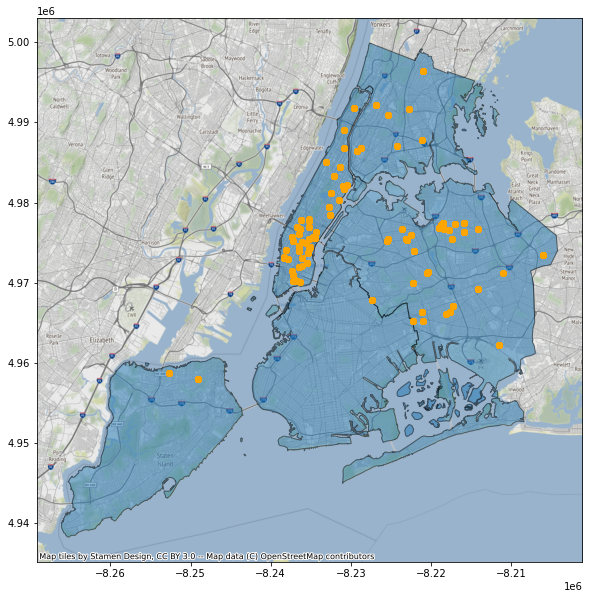

In [29]:
import contextily as ctx
test = geo_df[geo_df['BORO'] != 'Brooklyn']
test = test[test['Inspection_year'] == 2020]
test = test[test['GRADE'] == 'C']
boros = gpd.read_file(gpd.datasets.get_path("nybb"))
test.crs = 4326
# boros.crs = 4326
test = test.to_crs(epsg=3857)
boros = boros.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(20,10))
boros.plot(ax=ax, alpha=0.5, edgecolor="black")
test.plot(ax=ax, color="orange")

ctx.add_basemap(ax, zoom = 12)